In [29]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import h5py
import os
import seaborn as sns
import shutil

In [30]:
def plot_delta_ovlp(filename="abvmc.hdf5", discard = 2, annot=True):
    copyfile = "copy_" + filename
    shutil.copyfile(filename, copyfile)
    f = h5py.File(copyfile, "r")    
    keys = f.keys()
    
    fig, ax = plt.subplots(3, 2, figsize = (12, 15))    
    ovlp_ij_raw=np.array(f['excitationsovlp_ij'])
    delta_ij_raw=np.array(f['excitationsdelta'])
    discard = 2
    ovlp_ij = np.average(ovlp_ij_raw[discard:], axis=0)
    # plt.figure()
    sns.heatmap(ovlp_ij, ax=ax[0, 0], annot=annot)
    ax[0, 0].set_title('Overlap matrix')
    # plt.title('Overlap matrix')

    ovlp_ij_std = np.std(ovlp_ij_raw[discard:], axis=0)
    sns.heatmap(ovlp_ij_std, ax=ax[1, 0], annot=annot)
    ax[1, 0].set_title('Standard deviation of overlap matrix')
    
    filtered_ovlp_ij = copy.deepcopy(ovlp_ij)
    filtered_ovlp_ij[ovlp_ij_std>np.abs(ovlp_ij)] = 0
    sns.heatmap(filtered_ovlp_ij, ax=ax[2, 0], annot=annot)
    ax[2, 0].set_title('Filtered overlap matrix')
    


    delta_ij = np.average(delta_ij_raw[discard:], axis=0)
    sns.heatmap(delta_ij, ax=ax[0, 1], annot=annot)
    ax[0, 1].set_title('Delta matrix')
                       
    delta_ij_std = np.std(delta_ij_raw[discard:], axis=0)
    sns.heatmap(delta_ij_std, ax=ax[1, 1], annot=annot)
    ax[1, 1].set_title('Standard deviation of delta matrix')
    

    filtered_delta_ij = copy.deepcopy(delta_ij)
    filtered_delta_ij[delta_ij_std>np.abs(delta_ij)] = 0
    sns.heatmap(filtered_delta_ij, ax=ax[2, 1], annot=annot)
    ax[2, 1].set_title('Filtered Delta matrix')

    os.remove(copyfile)
    return {'filtered': [filtered_ovlp_ij, filtered_delta_ij], 
            'raw': [ovlp_ij_raw, delta_ij_raw]}
# res = plot_delta_ovlp()

In [57]:
import pyqmc.api as pyq
abvmcopt_file = "he_opt_cas_1_nelecas_1_1.hdf5"
df = pyq.read_opt(abvmcopt_file)
df


,energy,iteration,error,fname
0,-2.865698,0,0.003341,he_opt_cas_1_nelecas_1_1.hdf5
1,-2.873601,1,0.001697,he_opt_cas_1_nelecas_1_1.hdf5
2,-2.872634,2,0.002894,he_opt_cas_1_nelecas_1_1.hdf5
3,-2.870383,3,0.002394,he_opt_cas_1_nelecas_1_1.hdf5
4,-2.872082,4,0.003466,he_opt_cas_1_nelecas_1_1.hdf5
5,-2.869038,5,0.002552,he_opt_cas_1_nelecas_1_1.hdf5
6,-2.877468,6,0.001723,he_opt_cas_1_nelecas_1_1.hdf5
7,-2.868367,7,0.001426,he_opt_cas_1_nelecas_1_1.hdf5
8,-2.866170,8,0.001319,he_opt_cas_1_nelecas_1_1.hdf5
9,-2.868266,9,0.001672,he_opt_cas_1_nelecas_1_1.hdf5


Text(0, 0.5, 'Energy (Ha)')

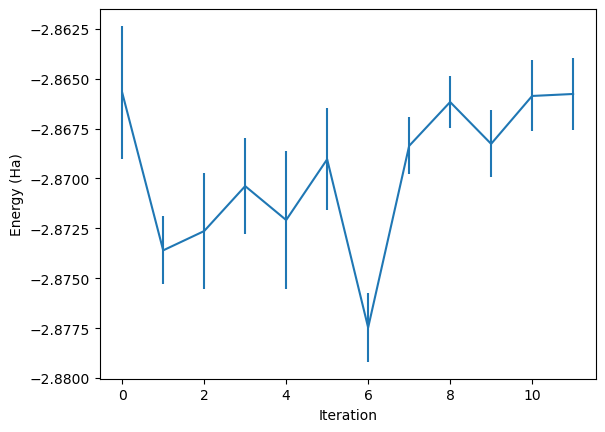

In [58]:
y = df['energy']
x = np.arange(len(y))
plt.errorbar(x, y, yerr = df['error'])
plt.xlabel("Iteration")
plt.ylabel("Energy (Ha)")

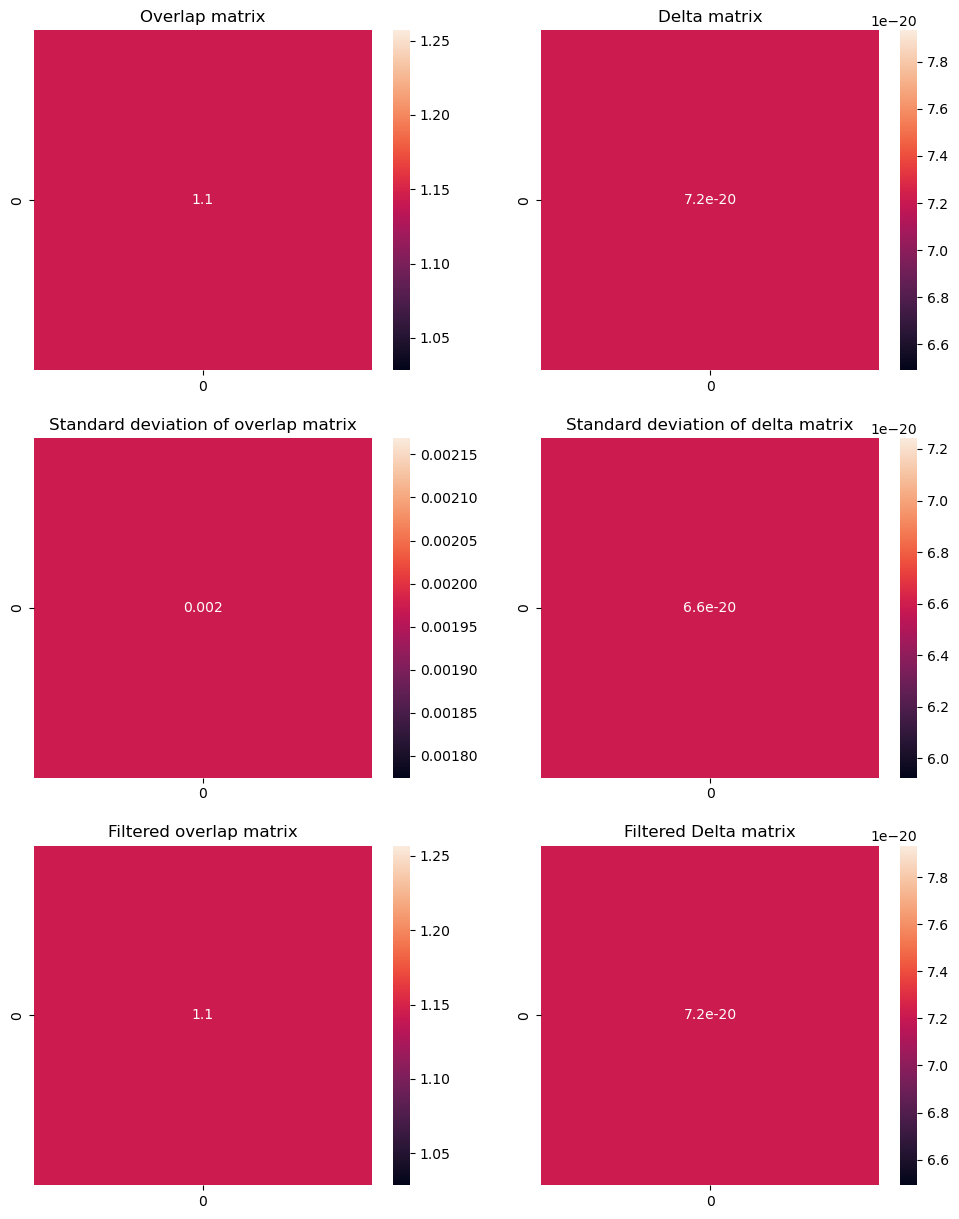

In [62]:
res = plot_delta_ovlp("he_vmc_cas_1_nelecas_1_1.hdf5", discard=2, annot=True)

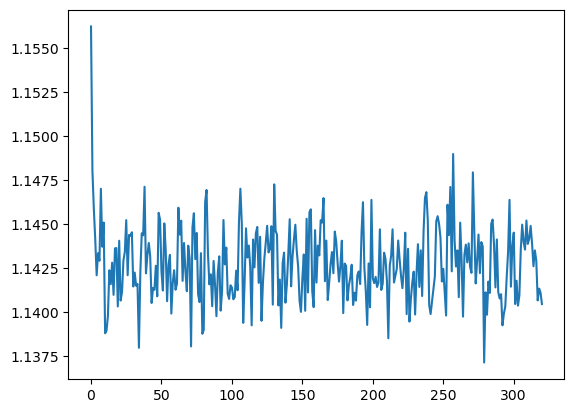

In [63]:
plt.plot(res['raw'][0][:, 0,0])